# Aim

The purpose of the seminar is to discuss how to build and evaluate univariate regression-type ML-models.

Explore the provided dataset, visualize interesting relationships and build at least two different ML-models that predicts the salary levels of people working in the machine learning field.

#### The dataset

- *Year* --> the year of the salary paid
- *Experience* --> the experience level in the job
- *Type* --> the type of employment
- *Title* --> the role/job title
- *Residence* --> the employee's primary country of residence
- *Salary* --> the total gross salary
- *Currency* --> the currency of the salary paid
- *Remote work* --> the possibility to work remotely
- *Company location* --> the country of the employer's main office
- *Company size* --> the size of the company during the year: S<50 employees, M 50-250 employees, L>250 employees
- *Salary in USD* --> this is the target variable which should be predicted

State the lowest MAE achieved in the comment.

# Setup

In [224]:
import sys

assert sys.version_info >= (3, 7)

In [225]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [226]:
# Other imports

import numpy as np
import pandas as pd
import scikitplot as skplt

import matplotlib.pyplot as plt
import seaborn as sns

# Get the data

Open the excel file and extract the data.

In [227]:
# Creating the dataframe
salaries = pd.read_excel (r'.\Salaries.xlsx')

# Quick Look at the Data Structure

In [228]:
rows, columns = salaries.shape
print(
    f"{'Rows:':<15}{rows:>10}",
    f"\n{'Columns:':<15}{columns:>10}",
)

Rows:                 607 
Columns:               11


In [229]:
salaries.head(7)

Year    Experience       Type                       Title Residence  \
0  2020  Intermediate  Full-time              Data Scientist        DE   
1  2020        Senior  Full-time  Machine Learning Scientist        JP   
2  2020        Senior  Full-time           Big Data Engineer        GB   
3  2020  Intermediate  Full-time        Product Data Analyst        HN   
4  2020        Senior  Full-time   Machine Learning Engineer        US   
5  2020        Junior  Full-time                Data Analyst        US   
6  2020        Senior  Full-time         Lead Data Scientist        US   

   Salary Currency Remote work Company location Company size  Salary in USD  
0   70000      EUR          No               DE            L          79833  
1  260000      USD          No               JP            S         260000  
2   85000      GBP   Partially               GB            M         109024  
3   20000      USD          No               HN            S          20000  
4  150000      USD   Partially               US            L         150000  
5   72000      USD         Yes               US            L          72000  
6  190000      USD         Yes               US            S         190000

In [230]:
salaries.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              607 non-null    int64 
 1   Experience        607 non-null    object
 2   Type              607 non-null    object
 3   Title             607 non-null    object
 4   Residence         607 non-null    object
 5   Salary            607 non-null    int64 
 6   Currency          607 non-null    object
 7   Remote work       607 non-null    object
 8   Company location  607 non-null    object
 9   Company size      607 non-null    object
 10  Salary in USD     607 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 52.3+ KB


In [231]:
# carrying out the statistical analysis on integer columns
salaries.describe().applymap('{:,.2f}'.format)

Year         Salary Salary in USD
count    607.00         607.00        607.00
mean   2,021.41     324,000.06    112,297.87
std        0.69   1,544,357.49     70,957.26
min    2,020.00       4,000.00      2,859.00
25%    2,021.00      70,000.00     62,726.00
50%    2,022.00     115,000.00    101,570.00
75%    2,022.00     165,000.00    150,000.00
max    2,022.00  30,400,000.00    600,000.00

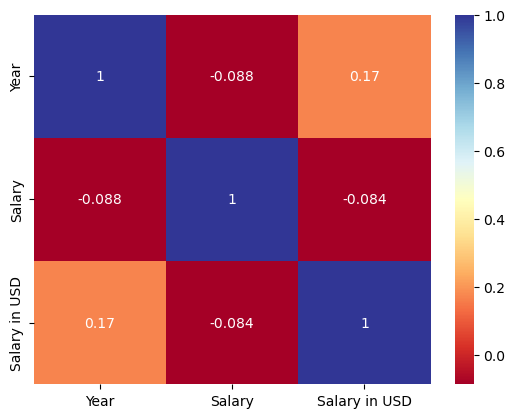

In [232]:
cor = salaries.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [233]:
salaries.Year.value_counts()

2022    318
2021    217
2020     72
Name: Year, dtype: int64

In [234]:
salaries.groupby('Year').mean()['Salary in USD'].astype(int)

Year
2020     95813
2021     99853
2022    124522
Name: Salary in USD, dtype: int32

In [235]:
salaries['Title'].nunique()

50

In [236]:
salaries['Title'].value_counts().head(8)

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Big Data Engineer              8
Name: Title, dtype: int64

In [237]:
salaries.Experience.value_counts()

Senior          280
Intermediate    213
Junior           88
Executive        26
Name: Experience, dtype: int64

In [238]:
salaries.Type.value_counts()

Full-time    588
Part-time     10
Temporary      5
Freelance      4
Name: Type, dtype: int64

In [239]:
salaries["Remote work"].value_counts()

Yes          381
No           127
Partially     99
Name: Remote work, dtype: int64

In [240]:
salaries["Company size"].value_counts()

M    326
L    198
S     83
Name: Company size, dtype: int64

c:\Users\albif\anaconda3\envs\NewML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary in USD', ylabel='Density'>

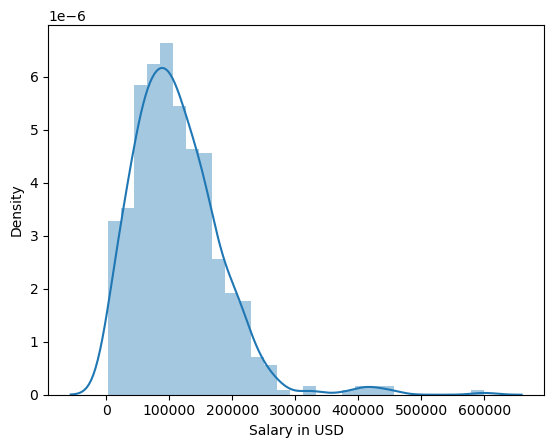

In [241]:
sns.distplot(salaries['Salary in USD'])

In [242]:
display(salaries[["Title","Salary in USD","Year",]].groupby(["Title","Year"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="CMRmap_r"))

# Divide Features from Labels

**Features** are individual independent variables that act like a input in your system.

**Labels** are the values we want to predict.

In [243]:
# split data into features and labels

X = salaries.drop(columns=["Salary", "Currency", "Salary in USD"])
y = salaries[["Salary in USD"]]

In [244]:
X.head(3)

Year    Experience       Type                       Title Residence  \
0  2020  Intermediate  Full-time              Data Scientist        DE   
1  2020        Senior  Full-time  Machine Learning Scientist        JP   
2  2020        Senior  Full-time           Big Data Engineer        GB   

  Remote work Company location Company size  
0          No               DE            L  
1          No               JP            S  
2   Partially               GB            M

In [245]:
y.head(3)

Salary in USD
0          79833
1         260000
2         109024

# Create a Test Set

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`X_train` - This includes your all independent variables that will be used to train the model. Also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model.

`X_test` - This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

`y_train` - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

`y_test` - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

-----

To understand when to use lowercase or uppercase, we need to know what is represented in `X_train` or `X_test`. It is a capital letter `X` to represent a 2-D matrix. And for `y_train` and `y_test`, it is a small letter `y` to represent a 1-D vector.

## Train Set

In [247]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)

Training Features Shape: (485, 8)
Training Labels Shape: (485, 1)


## Test Set

In [248]:
print('Test Features Shape:', X_test.shape)
print('Test Labels Shape:', y_test.shape)

Test Features Shape: (122, 8)
Test Labels Shape: (122, 1)


# Preprocessing

In [249]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error

numerical_cols = X_train.select_dtypes(include=['int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_cols),
        ("num", numeric_transformer, numerical_cols),
    ]
)

# Fit and Print Function

In [250]:
from sklearn.model_selection import cross_val_predict

def fit_and_print(p, X_train=X_train, y_train=y_train):
    p.fit(X_train, y_train.values.ravel())
    # train_predictions = cross_val_predict(p, X_train, y_train.values.ravel(), cv=1)
    train_predictions = p.predict(X_train)
    print("Training error: " + str(mean_absolute_error(train_predictions, y_train)))
    plt.scatter(train_predictions, y_train)
    test_predictions = p.predict(X_test)
    print("Test error: " + str(mean_absolute_error(test_predictions, y_test)))


# KNeighborsRegressor

Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

# Logistic Regression

Training error: 25402.334020618557
Test error: 41426.770491803276


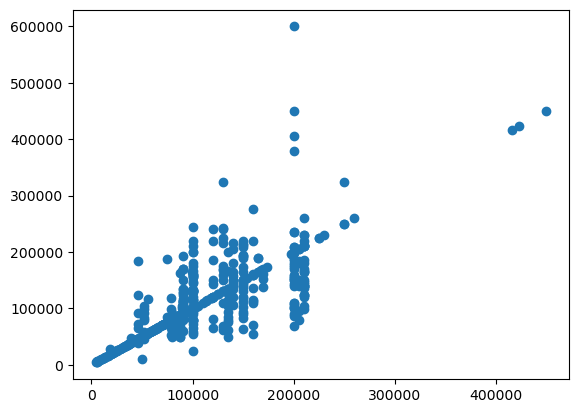

In [253]:
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

fit_and_print(log_reg)

# Gradient Boosting Regressor

Training error: 27348.148178108768
Test error: 29348.92293941229


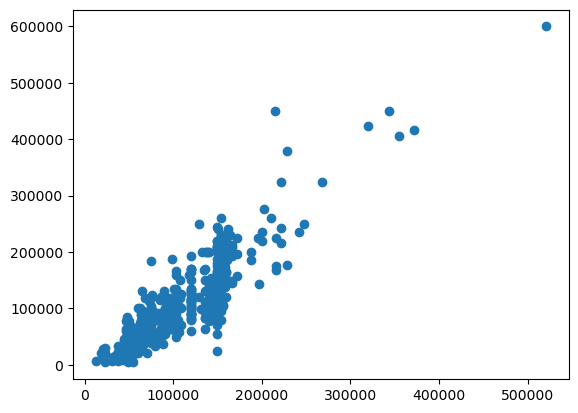

In [254]:
from sklearn.ensemble import GradientBoostingRegressor

gbo_params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbo_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GradientBoostingRegressor(**gbo_params))]
)

fit_and_print(gbo_reg)

# Random Forest Regressor

Training error: 31593.636770542926
Test error: 30007.69364040494


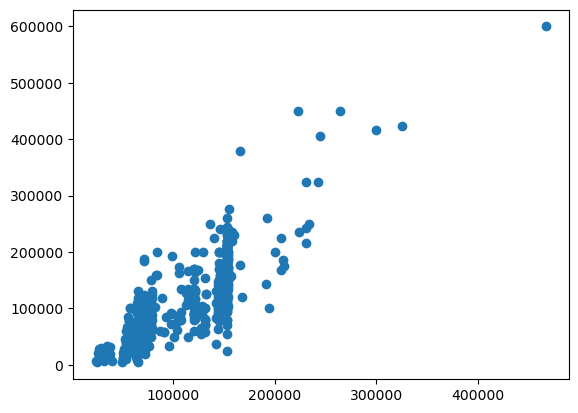

In [255]:
from sklearn.ensemble import RandomForestRegressor

rnf_params = {
    "max_depth": 5,
    "random_state": 17
}

rnf_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor(**rnf_params))]
)

fit_and_print(rnf_reg)

# Epsilon-Support Vector Regression

Training error: 53392.49642492582
Test error: 46335.967840066776


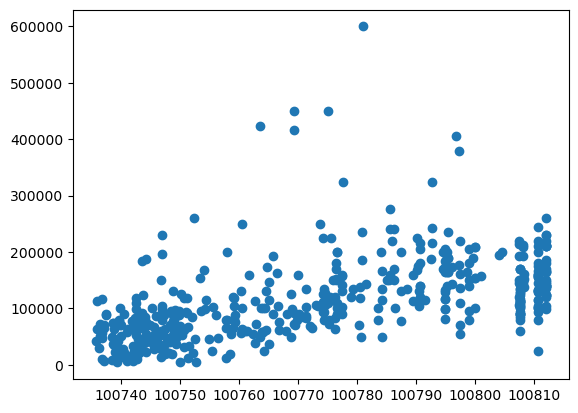

In [256]:
from sklearn.svm import SVR

svr_params = {
    "C": 1.0,
    "epsilon":0.2
}

svr_reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVR(**svr_params))]
)

fit_and_print(svr_reg)
